<a href="https://colab.research.google.com/github/divyansheeverma/PROJECTS/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/content/project 2 data.csv')
df.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [12]:
df.shape


(783, 1285)

In [13]:
df.describe()


,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,783.000000,783.000000,783.000000,783.000000,783.000000,7.830000e+02,723.000000,723.000000,683.000000,683.000000,...,726.000000,726.000000,718.000000,726.000000,718.000000,718.000000,782.000000,767.000000,767.000000,782.000000
mean,33.655524,34.213762,32.902913,33.509981,33.038947,2.457452e+05,45.745674,49.781451,46.595414,49.902378,...,23.479472,43.590352,43.730070,43.590352,43.730070,0.183570,1.408103,-0.800094,0.766417,0.221228
std,133.214348,135.101952,130.297143,132.537860,130.173860,3.815316e+05,13.687907,5.032378,10.160357,3.537991,...,107.446108,30.235352,28.691858,30.235352,28.691858,10.298085,1.790734,6.683374,16.894172,0.415339
min,1.050000,1.150000,0.820000,1.090000,1.090000,2.120000e+03,7.260120,40.924816,23.508970,43.361270,...,1.370000,-5.441012,-3.838026,-5.441012,-3.838026,-36.009395,0.075391,-70.529358,-24.673205,0.000000
25%,2.050000,2.110000,1.950000,2.020000,2.020000,4.697000e+04,36.465786,47.038600,39.790542,48.209823,...,2.280000,15.582340,17.375977,15.582340,17.375977,-5.704252,0.650438,-0.300000,-6.689173,0.000000
50%,3.330000,3.490000,3.100000,3.180000,3.180000,1.167000e+05,45.450519,48.377749,46.261572,48.946928,...,3.897500,40.424438,38.434207,40.424438,38.434207,0.028578,1.005433,-0.060000,-1.432470,0.000000
75%,15.410000,15.695000,15.097500,15.390000,15.390000,2.730000e+05,54.261728,50.844944,52.606664,50.471844,...,16.309999,68.800404,69.745893,68.800404,69.745893,6.332110,1.553062,0.190000,4.027109,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,4.144400e+06,87.514759,87.874402,78.573057,83.023385,...,799.359985,100.000000,97.862744,100.000000,97.862744,35.756053,26.041415,32.897278,250.318539,1.000000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 7.7+ MB


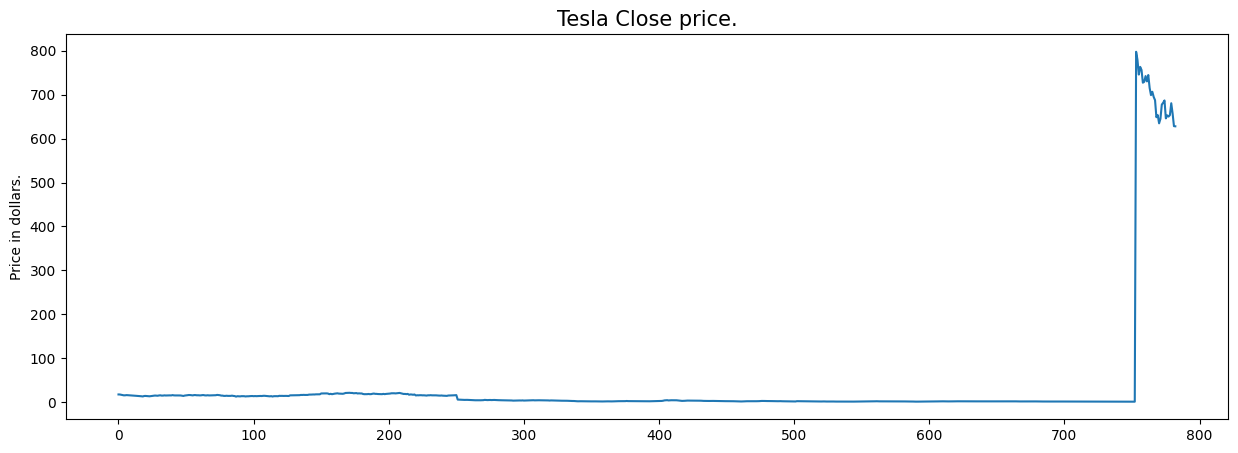

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [17]:
df.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [20]:
df[df['close'] == df['adjclose']].shape


(753, 1285)

In [21]:
df = df.drop(['adjclose'], axis=1)


In [22]:
df.isnull().sum()


date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    65
volumenrelativo      1
diff                16
INCREMENTO          16
TARGET               1
Length: 1284, dtype: int64

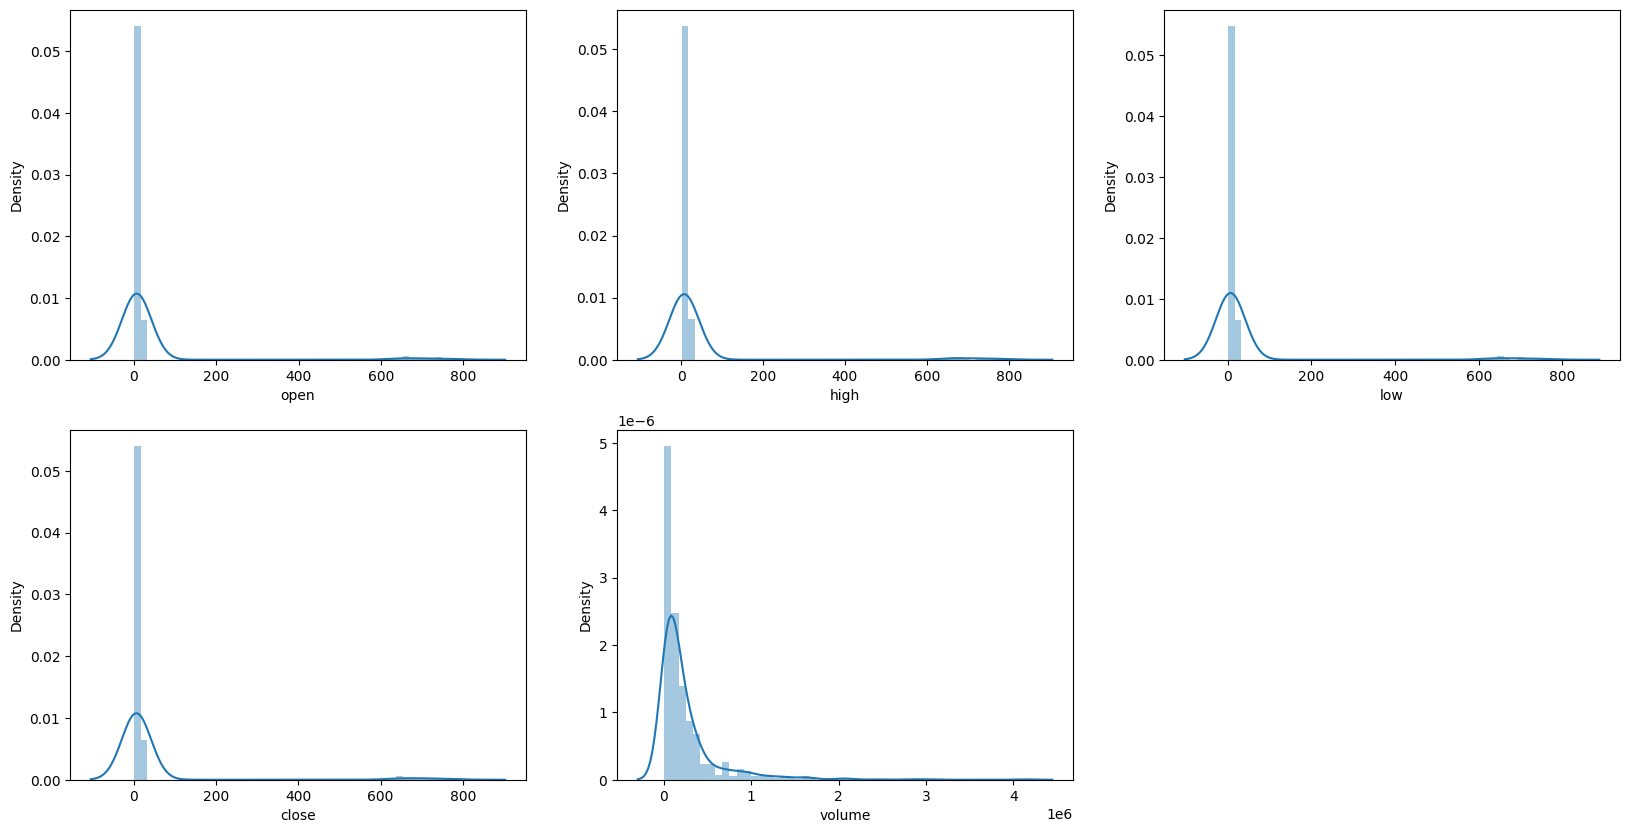

In [26]:
features = ['open', 'high', 'low', 'close', 'volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


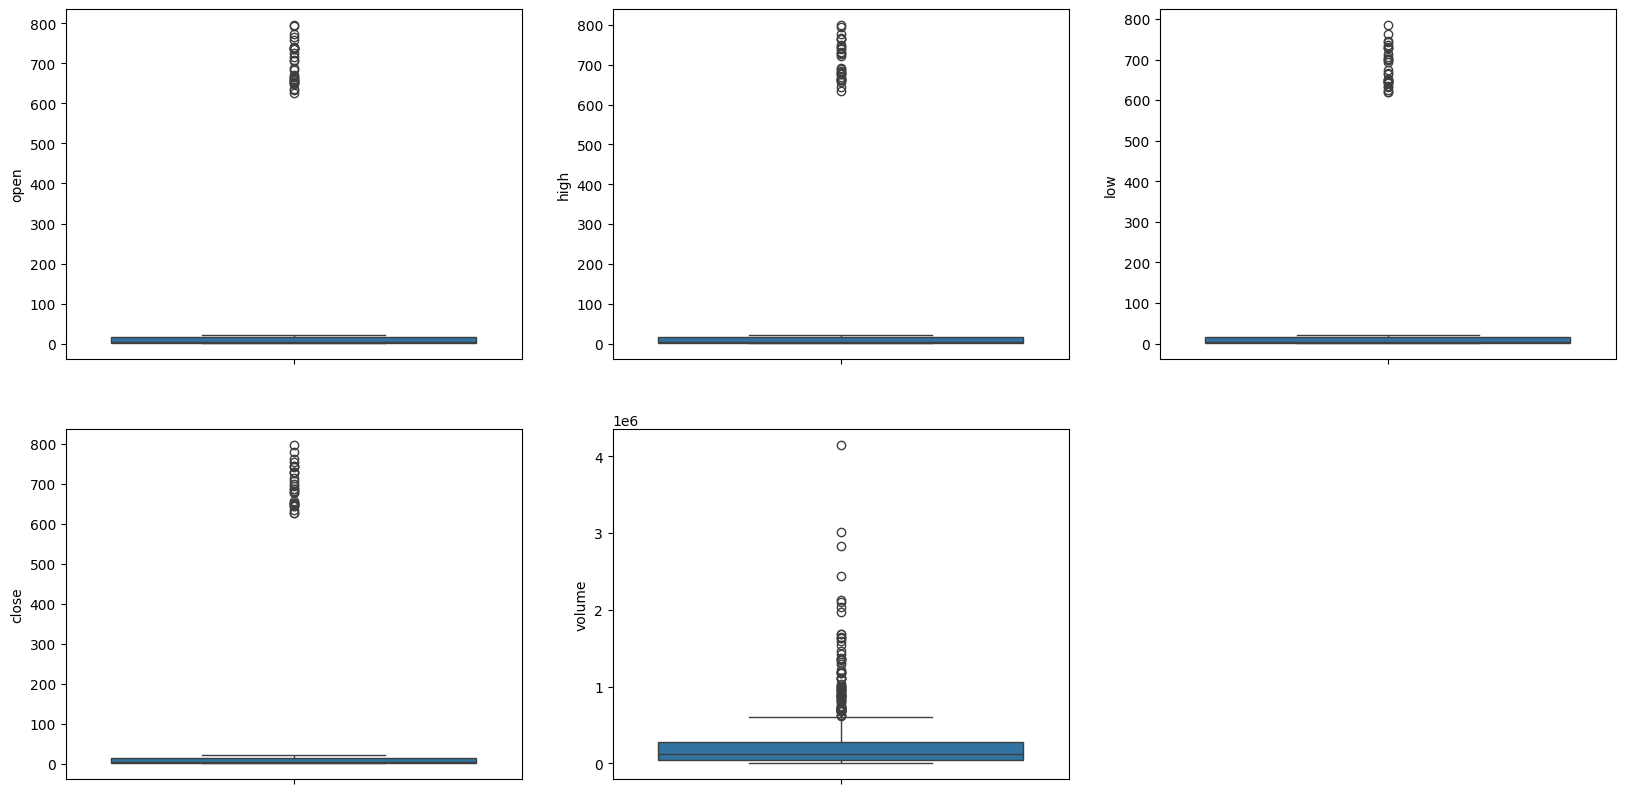

In [27]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [47]:
X = df[['high','low','open','volume']].values
y = df['close'].values
print(X)


[[1.82189999e+01 1.75000000e+01 1.77999992e+01 1.06600000e+05]
 [1.83099995e+01 1.76200008e+01 1.77000008e+01 1.28700000e+05]
 [1.77999992e+01 1.69099998e+01 1.75799999e+01 1.03100000e+05]
 ...
 [6.77619995e+02 6.53000000e+02 6.54590027e+02 9.61200000e+05]
 [6.60320007e+02 6.25250000e+02 6.57539978e+02 1.11630000e+06]
 [6.34950012e+02 6.20000000e+02 6.26150024e+02 8.90200000e+05]]


In [48]:
print(y)

[ 17.76000023  17.65999985  16.95000076  16.17000008  15.71000004
  15.85999966  16.28000069  16.02000046  15.81000042  15.59000015
  15.39999962  14.97999954  14.90999985  14.40999985  14.40999985
  14.22999954  14.18000031  13.64999962  13.22999954  14.22999954
  14.38000011  14.06000042  13.48999977  13.57999992  14.05000019
  14.73999977  14.97999954  15.27000046  15.06000042  14.81999969
  15.5         15.77000046  15.11999989  15.21000004  15.68000031
  15.36999989  15.51000023  15.82999992  15.65999985  15.55000019
  16.25        15.65999985  15.52000046  15.64999962  15.52999973
  15.60999966  15.44999981  14.85000038  14.35000038  15.22000027
  15.55000019  16.02000046  16.47999954  16.38999939  16.03000069
  15.63000011  16.37000084  16.29000092  15.85999966  15.92000008
  15.64000034  15.72000027  16.25        16.29999924  15.61999989
  15.55000019  15.94999981  15.52999973  15.52000046  15.72000027
  15.77000046  15.75        16.03000069  16.72999954  16.43000031
  16.03000

In [49]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [63]:
splitted = df['date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,date,open,high,low,close,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,106600,ASLE,NaN,NaN,NaN,...,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0,1,3,2022
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,128700,ASLE,NaN,NaN,NaN,...,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0,1,4,2022
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,103100,ASLE,NaN,NaN,NaN,...,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0,1,5,2022
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,173600,ASLE,NaN,NaN,NaN,...,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0,1,6,2022
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,137800,ASLE,NaN,NaN,NaN,...,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0,1,7,2022


In [64]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,date,open,high,low,close,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,...,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year,is_quarter_end
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,106600,ASLE,NaN,NaN,NaN,...,NaN,NaN,0.919758,-1.900001,-9.664295,0.0,1,3,2022,1
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,128700,ASLE,NaN,NaN,NaN,...,NaN,NaN,1.110440,-1.379999,-7.247895,0.0,1,4,2022,0
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,103100,ASLE,NaN,NaN,NaN,...,NaN,NaN,0.889560,-0.930000,-5.201344,0.0,1,5,2022,0
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,173600,ASLE,NaN,NaN,NaN,...,NaN,NaN,1.497843,-0.360000,-2.177856,0.0,1,6,2022,1
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,137800,ASLE,NaN,NaN,NaN,...,NaN,NaN,1.188956,-0.120000,-0.758054,0.0,1,7,2022,0


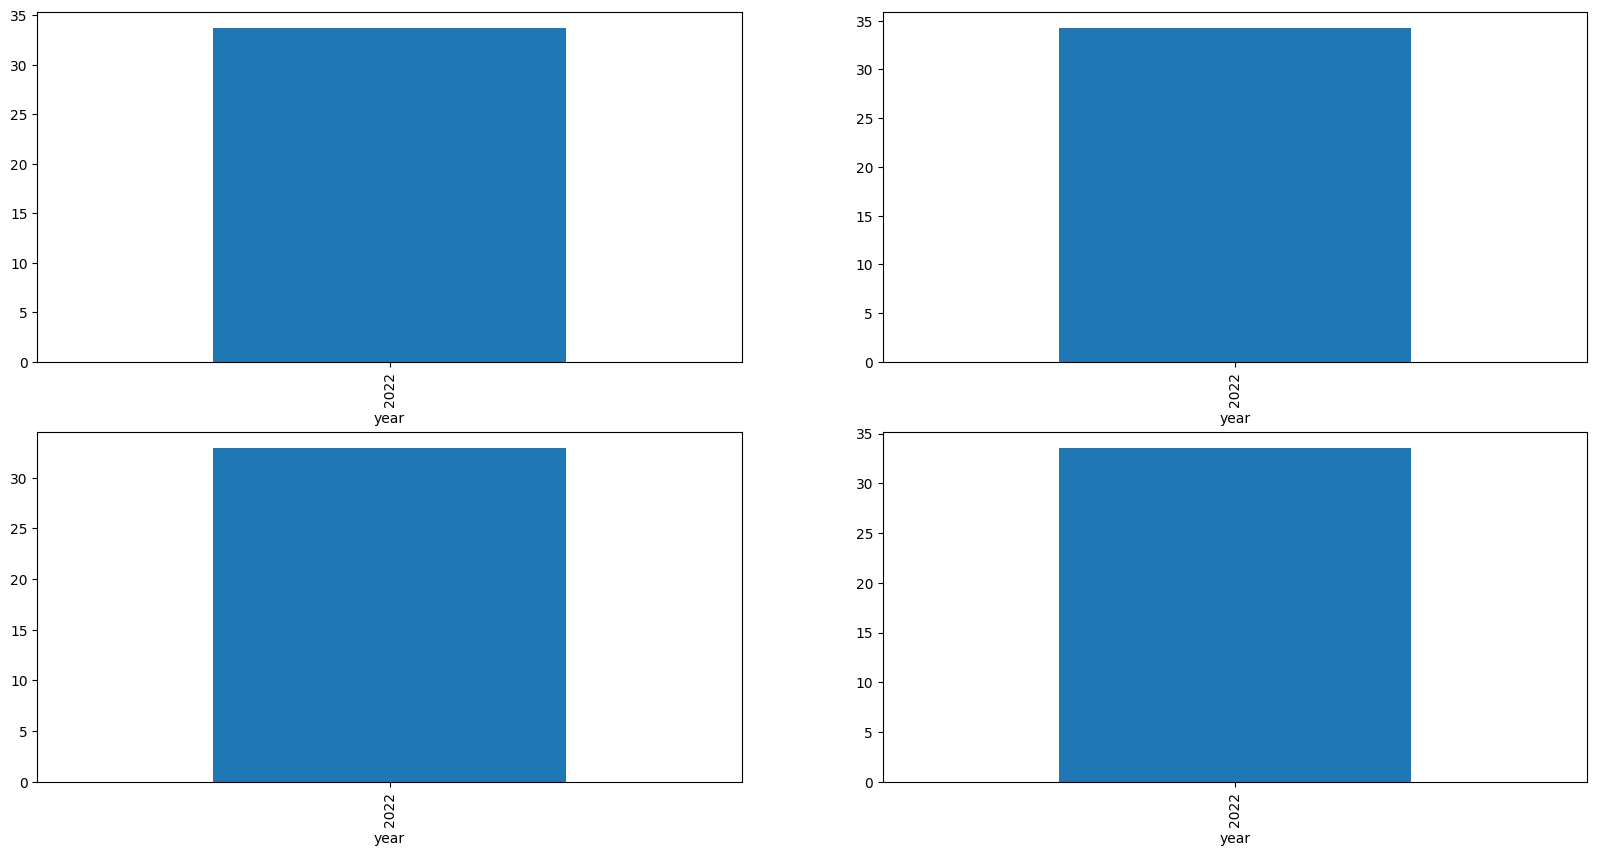

In [67]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [68]:
df.groupby('is_quarter_end').mean()


,open,high,low,close,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,RSIadjclose50,...,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,day,month,year
is_quarter_end,,,,,,,,,,,,,,,,,,,,,
0,34.014153,34.575372,33.252229,33.845009,235303.240223,45.442155,49.584750,46.426694,49.782523,47.305127,...,43.083562,43.536347,-0.194365,1.361117,-0.650662,0.706400,0.223881,6.322160,15.318436,2022.0
1,32.872663,33.424394,32.140382,32.778638,268539.186992,46.430643,50.225359,46.965177,50.165050,47.454600,...,44.711569,44.162894,1.027963,1.510477,-1.128224,0.898206,0.215447,6.410569,16.048780,2022.0


In [69]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


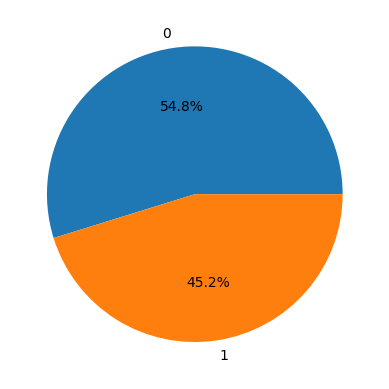

In [70]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [79]:
train = df.iloc[:-100]
test = df.iloc[-100:]

In [80]:
predictors = ["open", "high", "low", "close"] #Exempt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [72]:
from sklearn.metrics import precision_score

In [81]:
pred = model.predict(test[predictors])

In [82]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])